In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_excel(r"C:\Users\Rohit\Desktop\Machine Learning\SkinSegmentation.xlsx")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
B              245057 non-null int64
G              245057 non-null int64
R              245057 non-null int64
SKINNONSKIN    245057 non-null int64
dtypes: int64(4)
memory usage: 7.5 MB


In [3]:
dataset.head()

,B,G,R,SKINNONSKIN
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


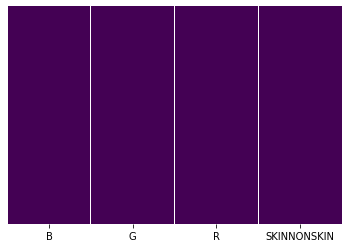

In [4]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="viridis")

### From the above heatmap we can say that we dont have any missing values present in our data.

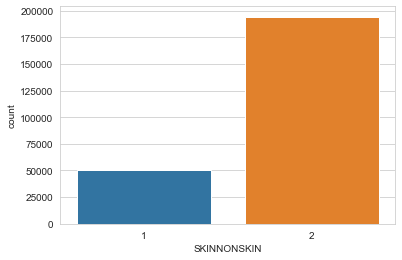

In [5]:
sns.set_style("whitegrid")
sns.countplot(x='SKINNONSKIN', data=dataset)

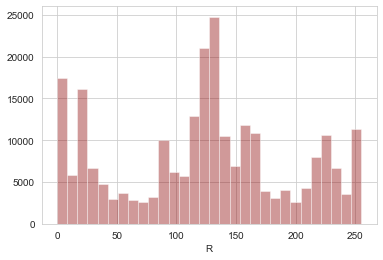

In [6]:
sns.distplot(dataset['R'].dropna(),kde=False,color='darkred',bins=30)

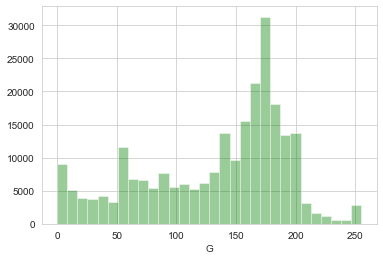

In [7]:
sns.distplot(dataset['G'].dropna(),kde=False,color='green',bins=30)

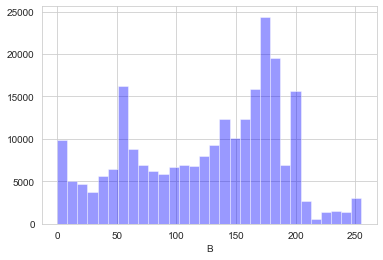

In [8]:
sns.distplot(dataset['B'].dropna(),kde=False,color='blue',bins=30)

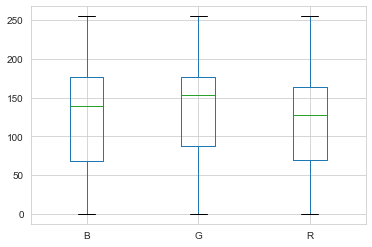

In [9]:
dataset.boxplot(column=['B','G','R'])

In [10]:
Quartile1 = dataset.B.quantile([0.25,0.5,0.75])
print(Quartile1)
LowerBound1 = Quartile1[0.25]-1.5*Quartile1[0.75]
print("LowerBound:\n",LowerBound1)
UpperBound1 = Quartile1[0.75]+1.5*Quartile1[0.25]
print("UpperBound:\n",UpperBound1)

0.25     68.0
0.50    139.0
0.75    176.0
Name: B, dtype: float64
LowerBound:
 -196.0
UpperBound:
 278.0


In [11]:
Quartile2 = dataset.G.quantile([0.25,0.5,0.75])
print(Quartile2)
LowerBound2 = Quartile2[0.25]-1.5*Quartile2[0.75]
print("LowerBound:\n",LowerBound2)
UpperBound2 = Quartile2[0.75]+1.5*Quartile2[0.25]
print("UpperBound:\n",UpperBound2)

0.25     87.0
0.50    153.0
0.75    177.0
Name: G, dtype: float64
LowerBound:
 -178.5
UpperBound:
 307.5


In [13]:
Quartile3 = dataset.R.quantile([0.25,0.5,0.75])
print(Quartile3)
LowerBound3 = Quartile3[0.25]-1.5*Quartile3[0.75]
print("LowerBound:\n",LowerBound3)
UpperBound3 = Quartile3[0.75]+1.5*Quartile3[0.25]
print("UpperBound:\n",UpperBound3)

0.25     70.0
0.50    128.0
0.75    164.0
Name: R, dtype: float64
LowerBound:
 -176.0
UpperBound:
 269.0


### From the above BOXPLOT and outlier calculations we can say that the data given to us is free from outliers as it satisfies the ranges.
### B--> Lower Bound = -196.0, Upper Bound = 278.0
### G--> Lower Bound = -178.5, Upper Bound = 307.5
### R--> Lower Bound = -176.0, Upper Bound = 269.0
### The Values given to us all ranges from 0-255 in B,G,R



In [14]:
feature_coloumn= ["B","G","R"]
X = dataset[feature_coloumn]
y = dataset.SKINNONSKIN

In [15]:
print(X)

          B    G    R
0        74   85  123
1        73   84  122
2        72   83  121
3        70   81  119
4        70   81  119
...     ...  ...  ...
245052  163  162  112
245053  163  162  112
245054  163  162  112
245055  163  162  112
245056  255  255  255

[245057 rows x 3 columns]


In [16]:
print(y)

0         1
1         1
2         1
3         1
4         1
         ..
245052    2
245053    2
245054    2
245055    2
245056    2
Name: SKINNONSKIN, Length: 245057, dtype: int64


In [17]:
import numpy as np
X,y = X[:245057],y[:245057]
shuffle_index = np.random.permutation(245057)
X,y = X.iloc[shuffle_index],y.iloc[shuffle_index]

In [18]:
print(X)

          B    G    R
13026   143  185  232
124299    2    0    1
202327  229   80   60
236953  166  168  116
227009  127  125   91
...     ...  ...  ...
238601  108   84  255
123694   14   16    4
33149   178  194  237
104586   56   55   41
118757   66   65   27

[245057 rows x 3 columns]


In [19]:
print(y)

13026     1
124299    2
202327    2
236953    2
227009    2
         ..
238601    2
123694    2
33149     1
104586    2
118757    2
Name: SKINNONSKIN, Length: 245057, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state = 0)

In [17]:
print("X_train Values:")
print(X_train)
print(X_train.shape)
print("---------------------")
print("y_train Values:")
print(y_train)
print(y_train.shape)

X_train Values:
          B    G    R
87866   111  112   56
192536  114  226  248
215115  173  171  123
4411     77   89  125
227863  185  182  137
...     ...  ...  ...
185362  234  218  212
32665   162  176  229
221214    2  130  101
128708  139  148   98
65177   165  162  111

[171539 rows x 3 columns]
(171539, 3)
---------------------
y_train Values:
87866     2
192536    2
215115    2
4411      1
227863    2
         ..
185362    2
32665     1
221214    2
128708    2
65177     2
Name: SKINNONSKIN, Length: 171539, dtype: int64
(171539,)


In [21]:
from sklearn.preprocessing import StandardScaler
sca = StandardScaler()
X_train = sca.fit_transform(X_train)
X_test = sca.transform(X_test)

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(X_train,y_train)

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = classifier1.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[12482  2664]
 [ 3349 55023]]
Classification report:
               precision    recall  f1-score   support

           1       0.79      0.82      0.81     15146
           2       0.95      0.94      0.95     58372

    accuracy                           0.92     73518
   macro avg       0.87      0.88      0.88     73518
weighted avg       0.92      0.92      0.92     73518



In [26]:
from sklearn import metrics
Accuracy1 = metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy:", Accuracy1)
print("\nMSE:",metrics.mean_squared_error(y_test,y_pred))

Accuracy: 91.82105062705732

MSE: 0.0817894937294268


In [27]:
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy: 91.93 %
Standard Deviation: 0.22 %


## XGBOOST Classifier

In [28]:
from xgboost import XGBClassifier
classifier3 = XGBClassifier()
classifier3.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [29]:
y_pred = classifier3.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15144     2]
 [   27 58345]]


In [34]:
from sklearn.model_selection import cross_val_score
accuracies3 = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies3.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))

Accuracy: 99.95 %
Standard Deviation: 0.02 %


## K-Nearest Neighbors


In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors =1 , metric = 'minkowski', p=2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [36]:
y_pred1 = classifier2.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred1))
print("Classification report:\n",classification_report(y_test, y_pred1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1)*100)

Confusion Matrix:
 [[15137     9]
 [   28 58344]]
Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     15146
           2       1.00      1.00      1.00     58372

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518

Accuracy: 99.94967218912375


In [38]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

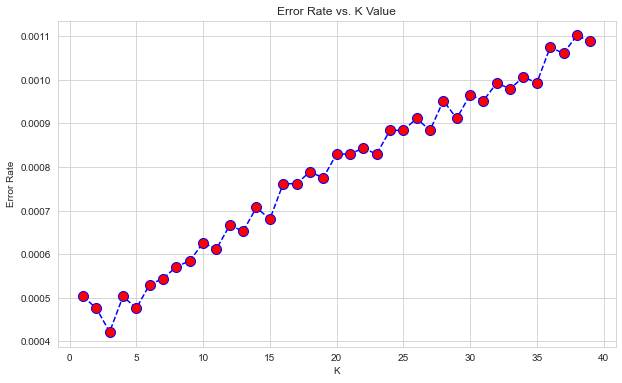

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors =3 , metric = 'minkowski', p=2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [41]:
y_pred1 = classifier2.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred1))
print("Classification report:\n",classification_report(y_test, y_pred1))

Confusion Matrix:
 [[15268     5]
 [   25 58220]]
Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     15273
           2       1.00      1.00      1.00     58245

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518



In [42]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1)*100)
print("\nMSE:",metrics.mean_squared_error(y_test,y_pred1))

Accuracy: 99.95783345575234

MSE: 0.0004216654424766724


In [43]:
from sklearn.model_selection import cross_val_score
accuracies2 = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))

Accuracy: 99.95 %
Standard Deviation: 0.02 %


## Support Vector Machines(SVM)

In [44]:
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf', random_state = 0)
classifier4.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
y_pred = classifier4.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15145     1]
 [  121 58251]]


In [47]:
from sklearn.model_selection import cross_val_score
accuracies4 = cross_val_score(estimator = classifier4, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies4.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies4.std()*100))

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Accuracy: 99.82 %
Standard Deviation: 0.04 %


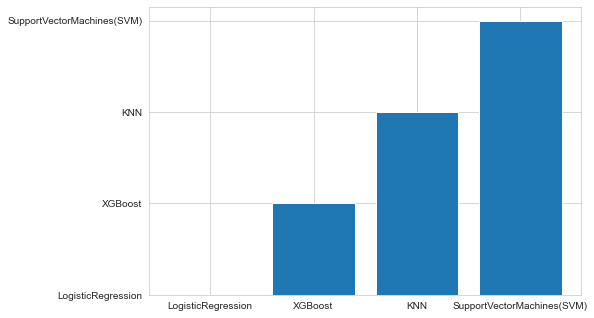

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Accuracies = ['LogisticRegression', 'XGBoost', 'KNN', 'SupportVectorMachines(SVM)']
X          = [accuracies1,accuracies3,accuracies2,accuracies4]
ax.bar(Classifier,Accuracies)
plt.show()


